<h1>Ejercicios para t-SNE</h1>

# Parámetros de t-SNE

1. **n_components**
   - Número de dimensiones a las que se reducirá el conjunto de datos.

2. **perplexity**
   - Un parámetro que afecta el balance entre la atención a las estructuras locales y globales. Debe ser menor que `n_samples`.

3. **early_exaggeration** 
   - Controla el espacio entre los puntos en la fase inicial. Valores más altos pueden hacer que el agrupamiento sea más pronunciado.
     Aquí, a las probabilidades $p_{i,j}$ las multiplica por el valor dado $k$ que debe ser mayor a 1, lo que logra aumentar las probabilidades y por tanto agrupar más los datos entre mayor sea $k$


# Parámetros de decenso al gradiente




1. **learning_rate** 
   - Tasa de aprendizaje. Valores demasiado bajos pueden hacer que la convergencia sea muy lenta, mientras que valores demasiado altos pueden hacer que no converja.

2. **n_iter** 
   - Número de iteraciones para la optimización. Más iteraciones pueden mejorar la convergencia.

3. **random_state** 
   - Controla la aleatoriedad de la inicialización y el muestreo de datos. Para resultados reproducibles, establece un valor entero.

# Parámetro general

1. **n_jobs** (int or None, default=None)
    - Número de trabajos paralelos para realizar la computación. `-1` utiliza todos los núcleos disponibles.



<h2>1.-Visualización</h2>

<h4>Importamos datos de un objeto en 3d</h4>

In [1]:
from sklearn import datasets, manifold
n_samples = 1500 #número de datos que se quieren
S_points, S_color = datasets.make_s_curve(n_samples, random_state=0) #Importación de número y colores de cada punto

<h4>Graficamos</h4>

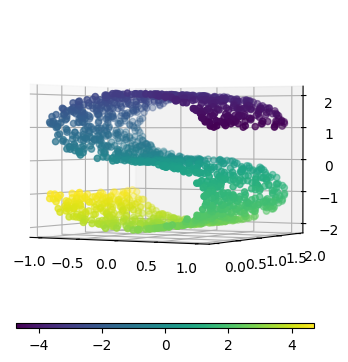

In [2]:
from mpl_toolkits import mplot3d
import numpy as np
import matplotlib.pyplot as plt

x, y, z = S_points.T #Obtención de cada una de las coordenadas 

fig = plt.figure()
ax = plt.axes(projection ='3d') #Se crea la gráfica 3d

ax.view_init(azim=-60, elev=1) #Esta línea sirve para ver la gráfica desde cierta persepectiva, azim es la inclinación fijando el eje z
                                #elev es desde que altura se ve
col = ax.scatter(x, y, z, c=S_color) #Se insertan los puntos
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=0.6, aspect=60, pad=0.01)
plt.show()

<h4>Ajuste de t-SNE y gráfica</h4>

In [3]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=50) #Inicializa t-SNE

S_points_tsne = tsne.fit_transform(S_points) #transformación de los datos
x_tsne,y_tsne = S_points_tsne.T #Obtención de las coordenadas x e y
tsne.kl_divergence_ #Revisamos la distancia de Kullback Leibler

0.39157634973526

/tmp/ipykernel_1447079/1106496838.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 300x300 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)


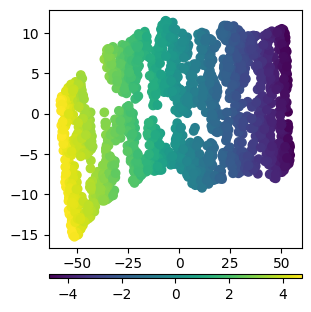

In [4]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x_tsne,y_tsne, c=S_color)
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)
plt.show()

<h5>gráficamos para distintos niveles de perplexity</h5>

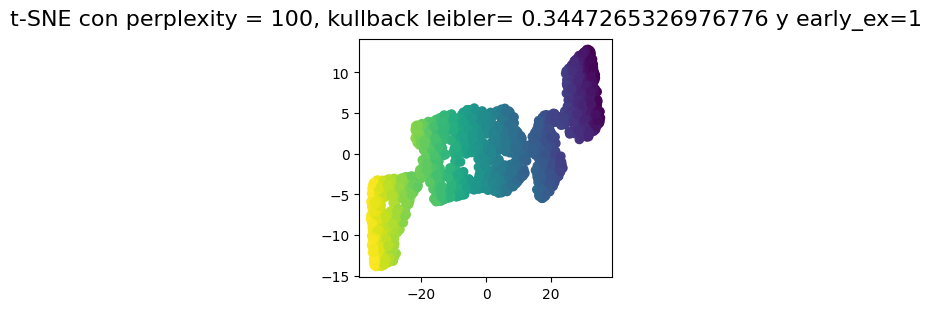

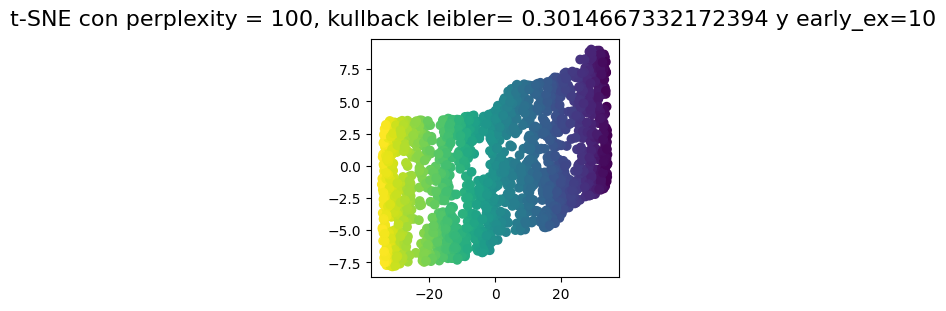

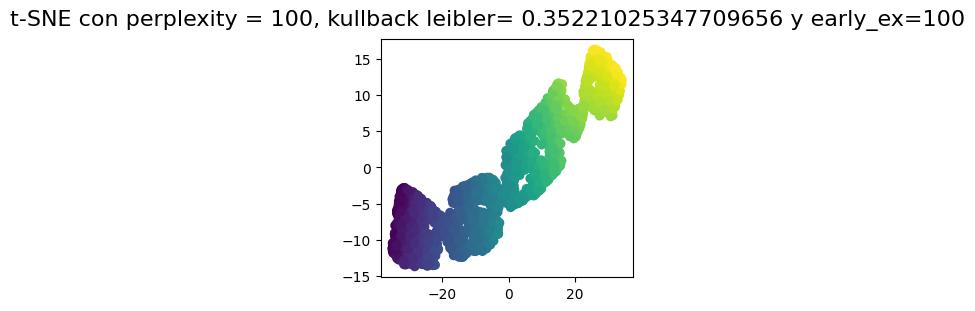

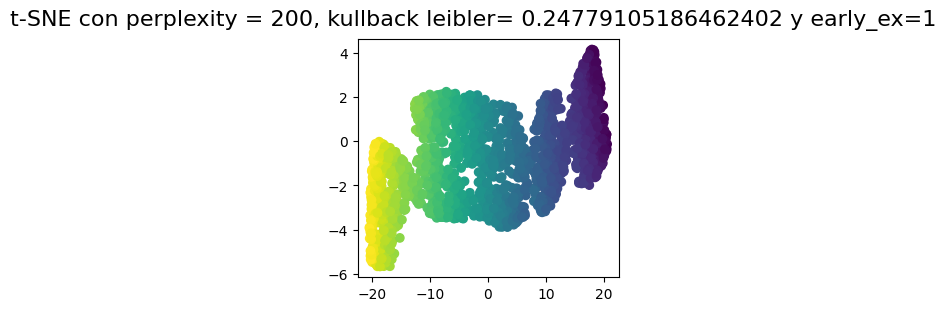

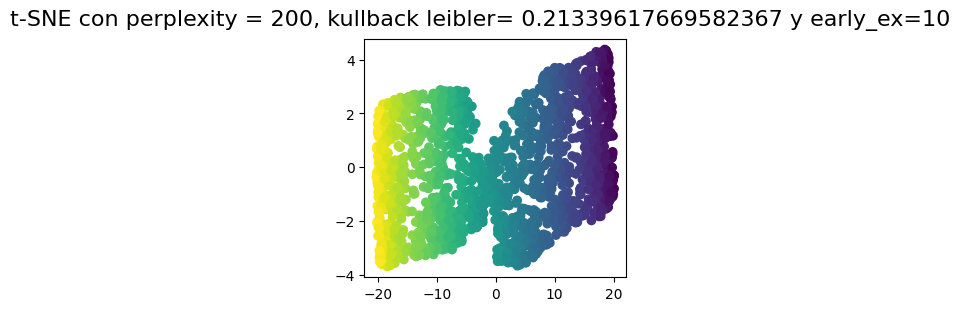

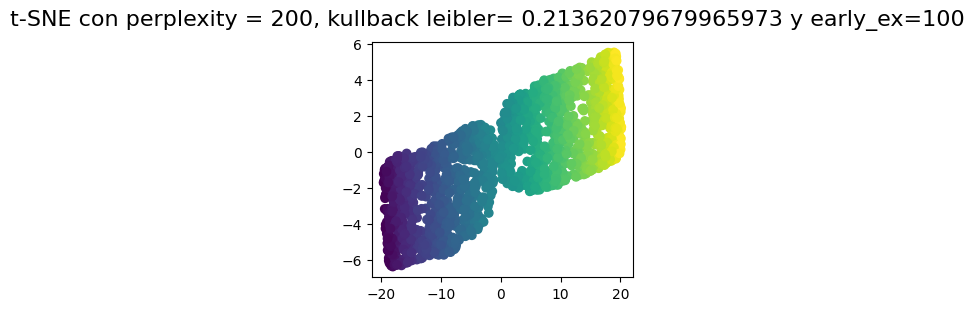

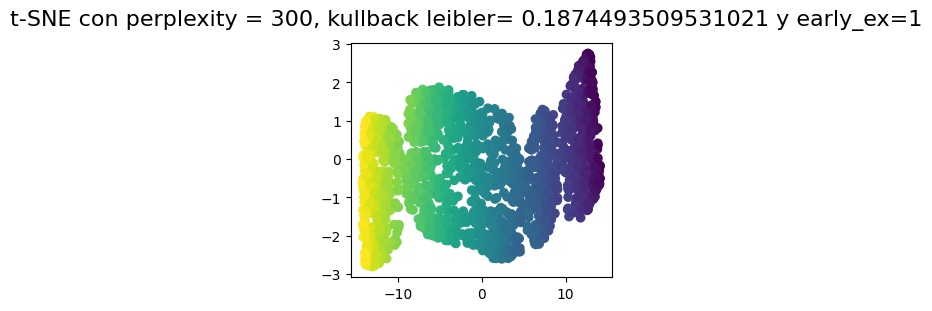

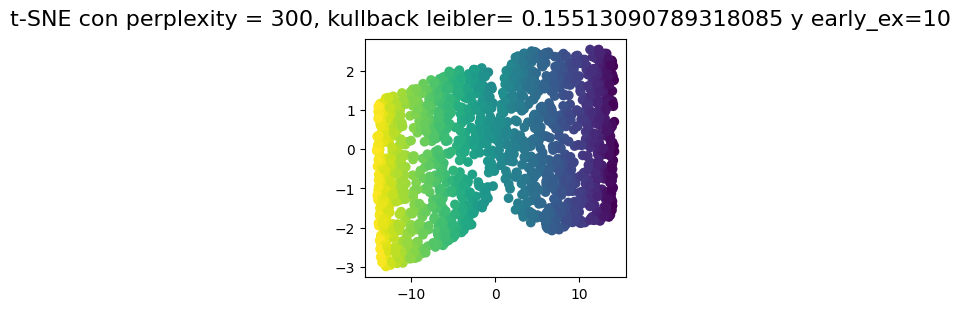

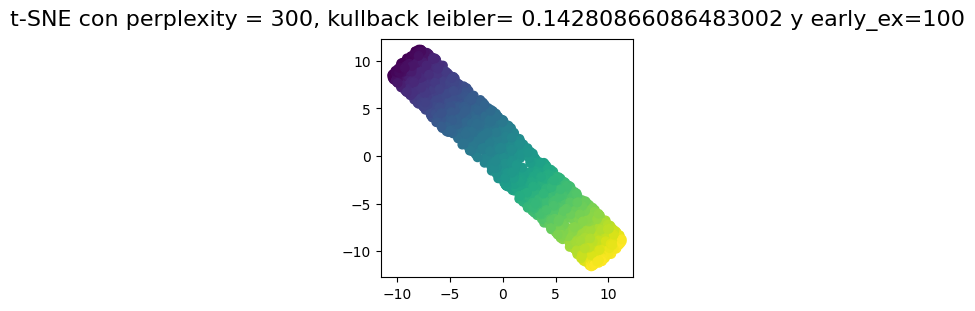

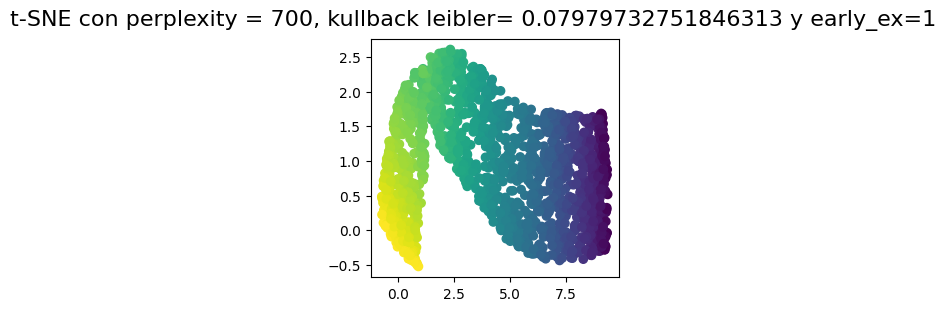

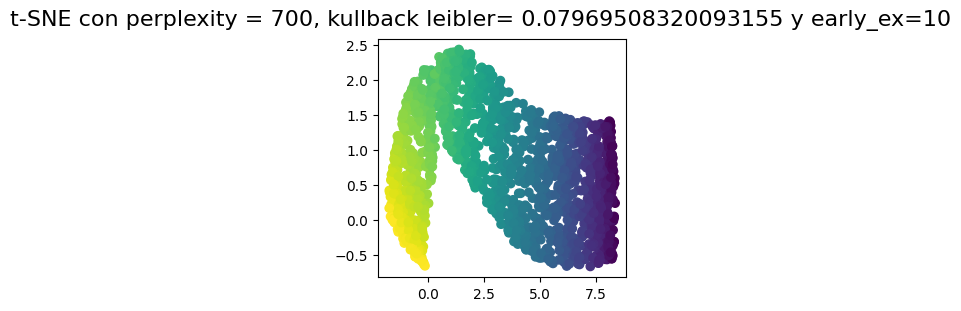

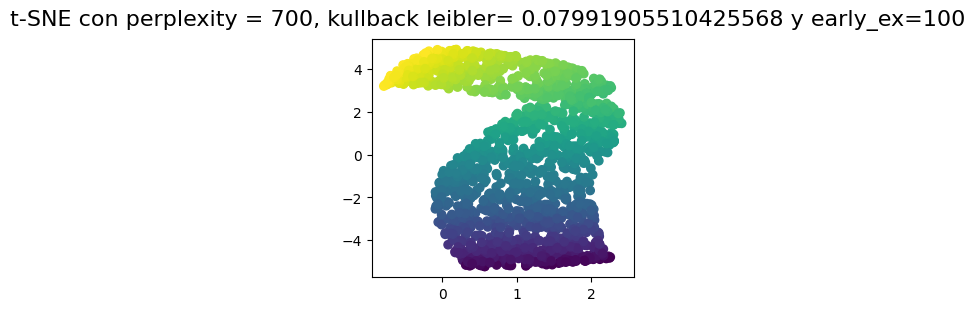

In [5]:
perplexitis=[100, 200 , 300 ,700]
exageration=[1,10,100]
for perplexity in perplexitis:
    for ex in exageration:
        tsne = TSNE(n_components=2,perplexity=perplexity,early_exaggeration=ex,n_jobs=3) #Inicializa t-SNE

        S_points_tsne = tsne.fit_transform(S_points) #transformación de los datos
        x_tsne,y_tsne = S_points_tsne.T #Obtención de las coordenadas x e y
        kl_div=tsne.kl_divergence_
    
        fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
        fig.suptitle(f't-SNE con perplexity = {perplexity}, kullback leibler= {kl_div} y early_ex={ex}', size=16)
        ax.scatter(x_tsne,y_tsne, c=S_color)

        plt.show()

<h2>Para hacer un mejor uso de t-SNE es recomendable hacer varias gráficas con distintos niveles de perplexity<h2>

<h4>Ajuste de PCA y gráfica. Comparación con t-SNE</h4>

In [6]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
S_points_pca=pca.fit_transform(S_points)
x_pca,y_pca = S_points_pca.T #Obtención de las coordenadas x e y

/tmp/ipykernel_1447079/940879041.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 300x300 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)


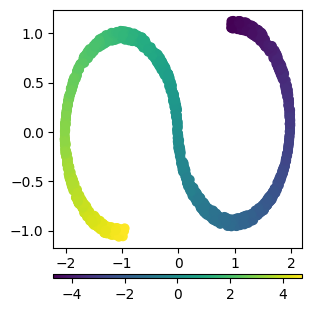

In [95]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x_pca,y_pca, c=S_color)
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)
plt.show()

<h2>2.-Los clusters generados por t-SNE no necesariamente dicen algo de los datos originales</h2>

<h3>Genearamos un conjunto de datos distribuidos de manera normal, con media 0 y varianzas 1</h3>

In [8]:
n_samples = 2000 #número de puntos

np.random.seed(42)
normal = np.random.normal(loc=0, scale=1, size=[n_samples//2,2])

x_normal,y_normal = normal.T

<h3>Gráfica</h3>

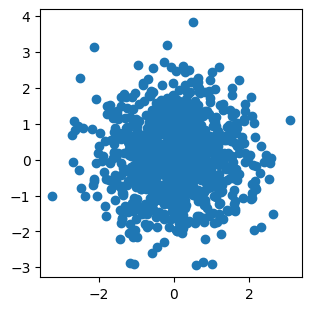

In [9]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x_normal,y_normal)

plt.show()

<h3> Se aplica t-SNE </h3>

In [10]:
from sklearn.manifold import TSNE
tsne = TSNE(n_components=2,perplexity=10) #Inicializa t-SNE

normal_tsne = tsne.fit_transform(normal) #transformación de los datos
x_normal_tsne, y_normal_tsne = normal_tsne.T #Obtención de las coordenadas x e y
tsne.kl_divergence_

0.5353943109512329

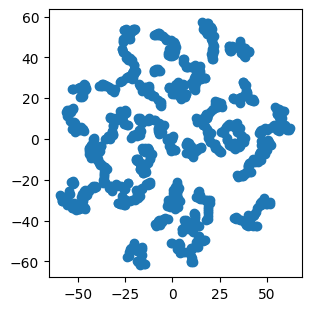

In [11]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x_normal_tsne,y_normal_tsne)

plt.show()

<h2>3.- Las distancias proyectadas no necesarimante indican algo del espacio original</h2>

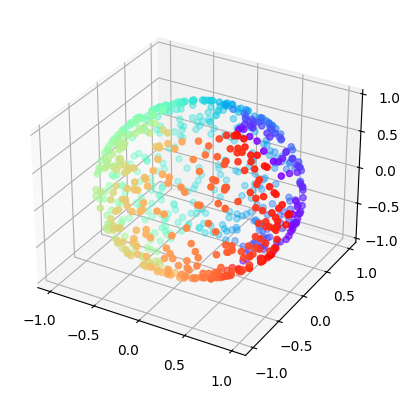

In [98]:
from sklearn.utils import check_random_state

# núemero de elementos para el cuadrado (0,2pi)x(0,pi)
n_samples = 1000

# se crea el cuadrado
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi )
t = random_state.rand(n_samples) * np.pi

# Se crea la esfera con coordenadas esfércias
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8))) #Esto añade cierto ruido en forma de huecos a la esfera
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# gráfica de la esfera
fig = plt.figure()
ax = plt.axes(projection ='3d')

ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
#ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T
plt.show()

<h3> Se ajusta y gráfica el resutlado de t-SNE</h3>

In [99]:
tsne = manifold.TSNE(n_components=2, perplexity=710,early_exaggeration=100,random_state=42) #Ajuste de T-sne
trans_data = tsne.fit_transform(sphere_data)
x,y=trans_data.T
tsne.kl_divergence_

0.005518365651369095

/tmp/ipykernel_1447079/3306430793.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 300x300 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)


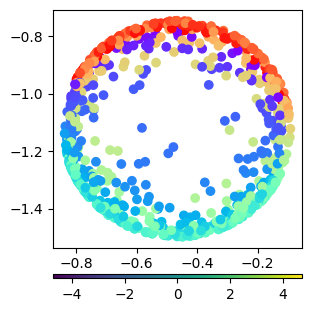

In [100]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x,y, c=p[indices], cmap=plt.cm.rainbow)
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)
plt.show()

<h3>Con diferentes parámetros:</h3>

In [101]:
tsne = manifold.TSNE(n_components=2, perplexity=190,early_exaggeration=2)
trans_data = tsne.fit_transform(sphere_data)
x,y=trans_data.T
tsne.kl_divergence_

0.32559943199157715

/tmp/ipykernel_1447079/3306430793.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 300x300 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)


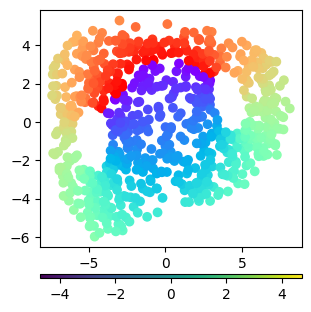

In [102]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x,y, c=p[indices], cmap=plt.cm.rainbow)
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)
plt.show()

In [103]:
pca=PCA(n_components=2)
pca_sphere=pca.fit_transform(sphere_data)
x_pca_sphere,y_pca_sphere=pca_sphere.T

/tmp/ipykernel_1447079/1950649490.py:3: UserWarning: Adding colorbar to a different Figure <Figure size 640x480 with 2 Axes> than <Figure size 300x300 with 2 Axes> which fig.colorbar is called on.
  fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)


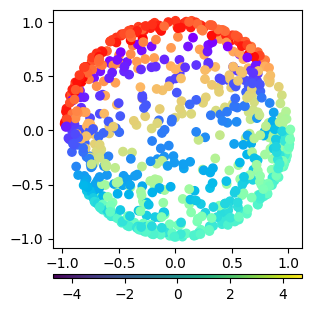

In [105]:
fig, ax = plt.subplots(figsize=(3, 3), facecolor="white", constrained_layout=True)
ax.scatter(x_pca_sphere,y_pca_sphere, c=p[indices], cmap=plt.cm.rainbow)
fig.colorbar(col, ax=ax, orientation="horizontal", shrink=1, aspect=60, pad=0.01)
plt.show()

<h2>Ejercicio con los datos de CAMDA Gut Microbiome: Visualizar con t-SNE los datos de taxonomy o pathways </h2>

In [ ]:
taxonomy=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/main/DataSets/CAMDA/taxonomy.csv',index_col=0)
metadata=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/refs/heads/main/DataSets/CAMDA/metadata.csv',index_col=2)
pathway=pd.read_csv('https://github.com/ccm-bioinfo/Camda25_gut/raw/refs/heads/main/DataSets/CAMDA/pathways.csv',on_bad_lines='skip',sep='\t',index_col=0)

In [ ]:
pathway=pathway.T
taxonomy=taxonomy.T
pathway['Diagnosis']=metadata['Diagnosis']
taxonomy['Diagnosis']=metadata['Diagnosis']

In [ ]:
X_path=pathway.drop(columns='Diagnosis').values
y_path=pathway['Diagnosis']
y_path[y_path!='Healthy']=0
y_path[y_path=='Healthy']=1

In [ ]:

# Aplicar t-SNE
tsne = TSNE(n_components=3,perplexity=500,early_exaggeration=2)
X_path_tsne = tsne.fit_transform(X_path)
tsne.kl_divergence_

In [ ]:
x1, x2, x3 = X_path_tsne.T #Obtención de cada una de las coordenadas 

fig = plt.figure()
ax = plt.axes(projection ='3d') #Se crea la gráfica 3d

#ax.view_init(azim=30, elev=3) #Esta línea sirve para ver la gráfica desde cierta persepectiva, azim es la inclinación fijando el eje z
                                #elev es desde que altura se ve
col = ax.scatter(x1, x2, x3,c=y_path.values, cmap='RdYlGn') #Se insertan los puntos

plt.show()

In [ ]:
X_tax=taxonomy.drop(columns='Diagnosis').values
y_tax=taxonomy['Diagnosis']
y_tax[y_tax!='Healthy']=0
y_tax[y_tax=='Healthy']=1

In [ ]:
# Aplicar t-SNE
tsne = TSNE(n_components=3,perplexity=500,early_exaggeration=2)
X_tax_tsne = tsne.fit_transform(X_tax)
tsne.kl_divergence_

In [ ]:
x1, x2, x3 = X_tax_tsne.T #Obtención de cada una de las coordenadas 

fig = plt.figure()
ax = plt.axes(projection ='3d') #Se crea la gráfica 3d

#ax.view_init(azim=30, elev=3) #Esta línea sirve para ver la gráfica desde cierta persepectiva, azim es la inclinación fijando el eje z
                                #elev es desde que altura se ve
col = ax.scatter(x1, x2, x3,c=y_tax.values, cmap='RdYlGn') #Se insertan los puntos

plt.show()

<h2>Clasificación de imágenes. No necesariamente perplexity más alta implica menor distancias KL</h2>

In [66]:
from sklearn.datasets import load_digits

digits = load_digits() ##LLama números del 0 al 9
X, y = digits.data, digits.target
n_samples, n_features = X.shape

y

array([0, 1, 2, ..., 8, 9, 8])

<h3> Se grafica para observar los datos</h3>

Text(0.5, 0.98, 'A selection from the 64-dimensional digits dataset')

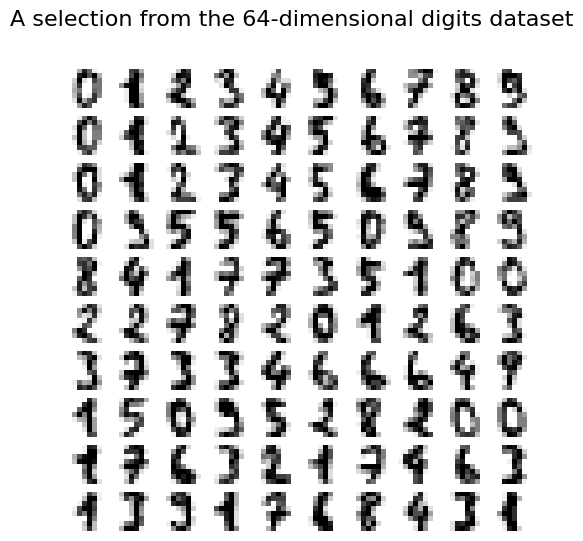

In [67]:
import matplotlib.pyplot as plt

fig, axs = plt.subplots(nrows=10, ncols=10, figsize=(6, 6))
for idx, ax in enumerate(axs.ravel()):
    ax.imshow(X[idx].reshape((8, 8)), cmap=plt.cm.binary)
    ax.axis("off")
fig.suptitle("A selection from the 64-dimensional digits dataset", fontsize=16)

In [78]:
tsne=TSNE(n_components=2,perplexity=1200,early_exaggeration=20)
X_tsne=tsne.fit_transform(X)
tsne.kl_divergence_

0.1569761484861374

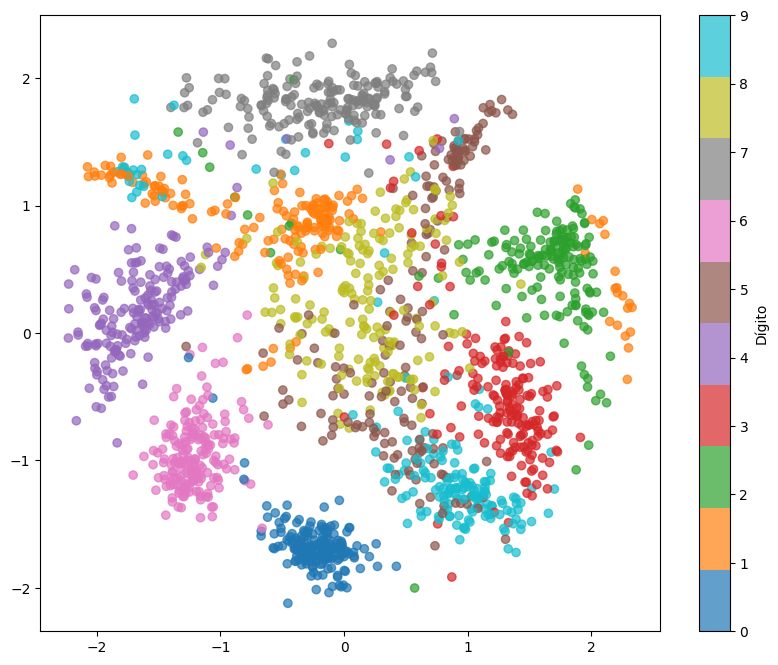

In [80]:
# Graficar
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap='tab10', alpha=0.7)
plt.colorbar(scatter, label='Dígito')
plt.show()


circles, perplexity=5 in 0.11 sec
circles, perplexity=30 in 0.2 sec
circles, perplexity=50 in 0.21 sec
circles, perplexity=100 in 0.22 sec
S-curve, perplexity=5 in 0.11 sec
S-curve, perplexity=30 in 0.18 sec
S-curve, perplexity=50 in 0.21 sec
S-curve, perplexity=100 in 0.21 sec
uniform grid, perplexity=5 in 0.15 sec
uniform grid, perplexity=30 in 0.23 sec
uniform grid, perplexity=50 in 0.24 sec
uniform grid, perplexity=100 in 0.25 sec


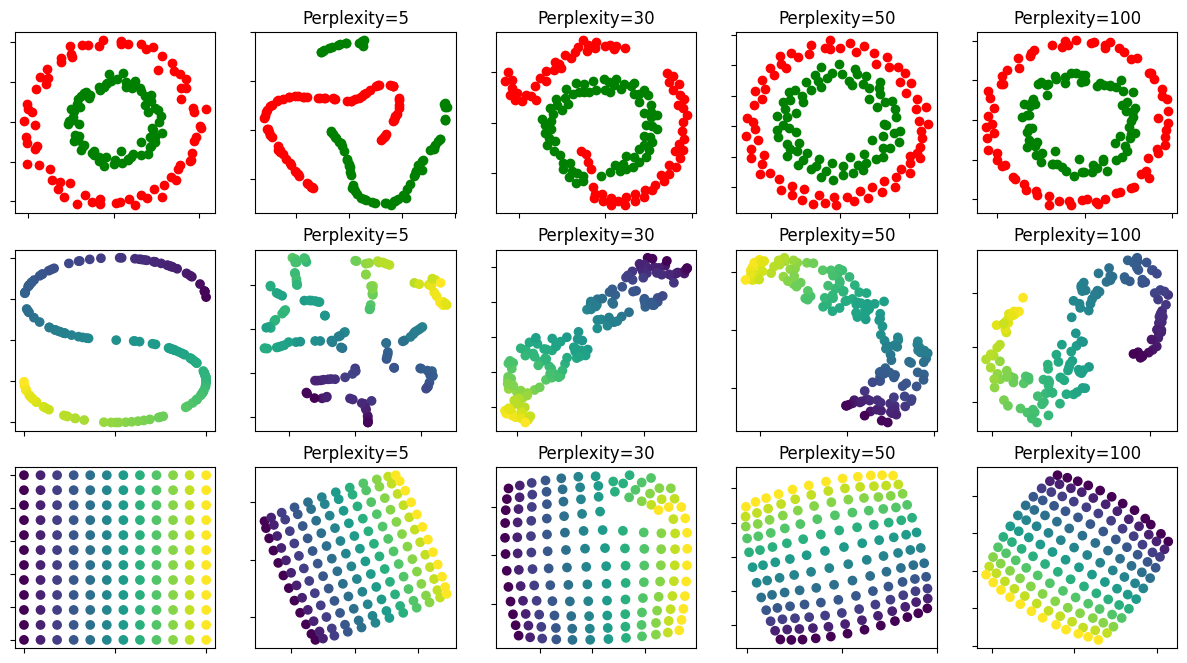

In [81]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from time import time

import matplotlib.pyplot as plt
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import datasets, manifold

n_samples = 150
n_components = 2
(fig, subplots) = plt.subplots(3, 5, figsize=(15, 8))
perplexities = [5, 30, 50, 100]

X, y = datasets.make_circles(
    n_samples=n_samples, factor=0.5, noise=0.05, random_state=0
)

red = y == 0
green = y == 1

ax = subplots[0][0]
ax.scatter(X[red, 0], X[red, 1], c="r")
ax.scatter(X[green, 0], X[green, 1], c="g")
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

for i, perplexity in enumerate(perplexities):
    ax = subplots[0][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("circles, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))
    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[red, 0], Y[red, 1], c="r")
    ax.scatter(Y[green, 0], Y[green, 1], c="g")
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")

# Another example using s-curve
X, color = datasets.make_s_curve(n_samples, random_state=0)

ax = subplots[1][0]
ax.scatter(X[:, 0], X[:, 2], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[1][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        learning_rate="auto",
        max_iter=300,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("S-curve, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


# Another example using a 2D uniform grid
x = np.linspace(0, 1, int(np.sqrt(n_samples)))
xx, yy = np.meshgrid(x, x)
X = np.hstack(
    [
        xx.ravel().reshape(-1, 1),
        yy.ravel().reshape(-1, 1),
    ]
)
color = xx.ravel()
ax = subplots[2][0]
ax.scatter(X[:, 0], X[:, 1], c=color)
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())

for i, perplexity in enumerate(perplexities):
    ax = subplots[2][i + 1]

    t0 = time()
    tsne = manifold.TSNE(
        n_components=n_components,
        init="random",
        random_state=0,
        perplexity=perplexity,
        max_iter=400,
    )
    Y = tsne.fit_transform(X)
    t1 = time()
    print("uniform grid, perplexity=%d in %.2g sec" % (perplexity, t1 - t0))

    ax.set_title("Perplexity=%d" % perplexity)
    ax.scatter(Y[:, 0], Y[:, 1], c=color)
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    ax.axis("tight")


plt.show()

standard: 0.043 sec
ltsa: 0.08 sec
hessian: 0.15 sec
modified: 0.11 sec
ISO: 0.15 sec
MDS: 0.57 sec
Spectral Embedding: 0.042 sec
t-SNE: 2.8 sec


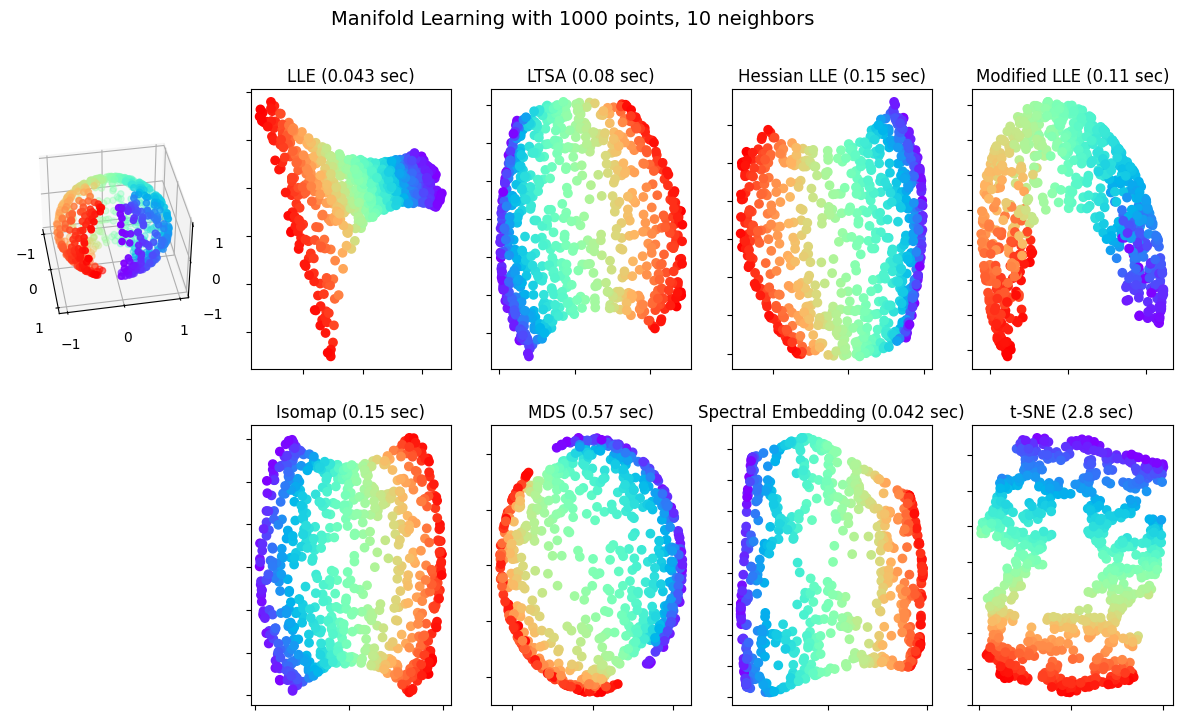

In [82]:
# Authors: The scikit-learn developers
# SPDX-License-Identifier: BSD-3-Clause

from time import time

import matplotlib.pyplot as plt

# Unused but required import for doing 3d projections with matplotlib < 3.2
import mpl_toolkits.mplot3d  # noqa: F401
import numpy as np
from matplotlib.ticker import NullFormatter

from sklearn import manifold
from sklearn.utils import check_random_state

# Variables for manifold learning.
n_neighbors = 10
n_samples = 1000

# Create our sphere.
random_state = check_random_state(0)
p = random_state.rand(n_samples) * (2 * np.pi - 0.55)
t = random_state.rand(n_samples) * np.pi

# Sever the poles from the sphere.
indices = (t < (np.pi - (np.pi / 8))) & (t > ((np.pi / 8)))
colors = p[indices]
x, y, z = (
    np.sin(t[indices]) * np.cos(p[indices]),
    np.sin(t[indices]) * np.sin(p[indices]),
    np.cos(t[indices]),
)

# Plot our dataset.
fig = plt.figure(figsize=(15, 8))
plt.suptitle(
    "Manifold Learning with %i points, %i neighbors" % (1000, n_neighbors), fontsize=14
)

ax = fig.add_subplot(251, projection="3d")
ax.scatter(x, y, z, c=p[indices], cmap=plt.cm.rainbow)
ax.view_init(40, -10)

sphere_data = np.array([x, y, z]).T

# Perform Locally Linear Embedding Manifold learning
methods = ["standard", "ltsa", "hessian", "modified"]
labels = ["LLE", "LTSA", "Hessian LLE", "Modified LLE"]

for i, method in enumerate(methods):
    t0 = time()
    trans_data = (
        manifold.LocallyLinearEmbedding(
            n_neighbors=n_neighbors, n_components=2, method=method, random_state=42
        )
        .fit_transform(sphere_data)
        .T
    )
    t1 = time()
    print("%s: %.2g sec" % (methods[i], t1 - t0))

    ax = fig.add_subplot(252 + i)
    plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
    plt.title("%s (%.2g sec)" % (labels[i], t1 - t0))
    ax.xaxis.set_major_formatter(NullFormatter())
    ax.yaxis.set_major_formatter(NullFormatter())
    plt.axis("tight")

# Perform Isomap Manifold learning.
t0 = time()
trans_data = (
    manifold.Isomap(n_neighbors=n_neighbors, n_components=2)
    .fit_transform(sphere_data)
    .T
)
t1 = time()
print("%s: %.2g sec" % ("ISO", t1 - t0))

ax = fig.add_subplot(257)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("%s (%.2g sec)" % ("Isomap", t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Multi-dimensional scaling.
t0 = time()
mds = manifold.MDS(2, max_iter=100, n_init=1, random_state=42)
trans_data = mds.fit_transform(sphere_data).T
t1 = time()
print("MDS: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(258)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("MDS (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform Spectral Embedding.
t0 = time()
se = manifold.SpectralEmbedding(
    n_components=2, n_neighbors=n_neighbors, random_state=42
)
trans_data = se.fit_transform(sphere_data).T
t1 = time()
print("Spectral Embedding: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(259)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("Spectral Embedding (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

# Perform t-distributed stochastic neighbor embedding.
t0 = time()
tsne = manifold.TSNE(n_components=2, random_state=0)
trans_data = tsne.fit_transform(sphere_data).T
t1 = time()
print("t-SNE: %.2g sec" % (t1 - t0))

ax = fig.add_subplot(2, 5, 10)
plt.scatter(trans_data[0], trans_data[1], c=colors, cmap=plt.cm.rainbow)
plt.title("t-SNE (%.2g sec)" % (t1 - t0))
ax.xaxis.set_major_formatter(NullFormatter())
ax.yaxis.set_major_formatter(NullFormatter())
plt.axis("tight")

plt.show()